In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


def get_delta(array):
    ar1 = np.insert(array,[0],np.array(0))
    ar2 = np.append(array,np.array(0))
    ar3 = (ar2-ar1)[:-1]
    #print(ar1,ar2,ar3)
    return ar3

def smoothgrad(array):
    array= np.append(array,array[-1])
    array= np.insert(array,[0],array[0])
    
    cnv = np.array([1,1,1])
    cnv_s = 3
    array_grad = np.gradient(array)
    print(array_grad)
    ar3= get_delta(array)
    
    
    smooth_grad = np.convolve(ar3,
                      cnv/cnv_s,
                      mode='valid')
    print(smooth_grad)
    out = np.zeros(len(array))
    print (out,ar3)
    for i,g in enumerate(smooth_grad):
        if i >=1:
            out[i] = out[i-1]+g
            print(g,out[i])
    out = out+smooth_grad

    out_min = out.min()
    if out_min < 0:
        #print("neg min")
        out = out- out_min
        out_min = out.min()
        
    arr_max = array.max()
    out_max = out.max()    
    arr_min = array.min()
    arr_range = arr_max - arr_min
    out_range = out_max - out_min
    print(out)
    out = out - out_min
    print(out)
    out = out / out_range
    print(out)
    out = out * arr_range
    print(out)
    out = out + arr_min
    print(out)    
    
    return out

def smooth1d(array,iterations=4):
    cnv = np.array([1,1,1])
    cnv_s = sum(cnv)
    
    out = np.append(array,array[-1])
    out= np.insert(out,[0],out[0])    
    
    
    print(f"pre-iter: {out}")
    for itr in range(iterations):
        out = np.convolve(out,
                          cnv/cnv_s,
                          mode='valid')
        out= np.append(out,out[-1])
        out= np.insert(out,[0],out[0])
        print(f"iter: {out}")


    out =out[1:-1]
    
    out_min = out.min()
    if out_min < 0:
        #print("neg min")
        out = out- out_min
        out_min = out.min()
        
    arr_max = array.max()
    out_max = out.max()    
    arr_min = array.min()
    arr_range = arr_max - arr_min
    out_range = out_max - out_min
    
    
    print(out)
    out = out - out_min
    print(out)
    out = out / out_range
    print(out)
    out = out * arr_range
    print(out)
    out = out + arr_min
    print(out)    
    missing = (array.sum()-out.sum())/len(out)
    out=out+missing
    print(out)    
    
    return out
a = np.array([10,5,1,6,7,10])
a = np.array([10,5,2,1,5,10])
    
#b=smoothgrad(a)
b=smooth1d(a)

pre-iter: [10 10  5  2  1  5 10 10]
iter: [8.33333333 8.33333333 5.66666667 2.66666667 2.66666667 5.33333333
 8.33333333 8.33333333]
iter: [7.44444444 7.44444444 5.55555556 3.66666667 3.55555556 5.44444444
 7.33333333 7.33333333]
iter: [6.81481481 6.81481481 5.55555556 4.25925926 4.22222222 5.44444444
 6.7037037  6.7037037 ]
iter: [6.39506173 6.39506173 5.54320988 4.67901235 4.64197531 5.45679012
 6.28395062 6.28395062]
[6.39506173 5.54320988 4.67901235 4.64197531 5.45679012 6.28395062]
[1.75308642 0.90123457 0.03703704 0.         0.81481481 1.64197531]
[1.         0.51408451 0.02112676 0.         0.46478873 0.93661972]
[9.         4.62676056 0.19014085 0.         4.18309859 8.42957746]
[10.          5.62676056  1.19014085  1.          5.18309859  9.42957746]
[10.09507042  5.72183099  1.28521127  1.09507042  5.27816901  9.52464789]


[0, 2, 4, 6, 8, 10, 1, 3, 5, 7, 9, 11]
[10.          5.          2.          1.          5.         10.
 10.09507042  5.72183099  1.28521127  1.09507042  5.27816901  9.52464789]
['red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green']


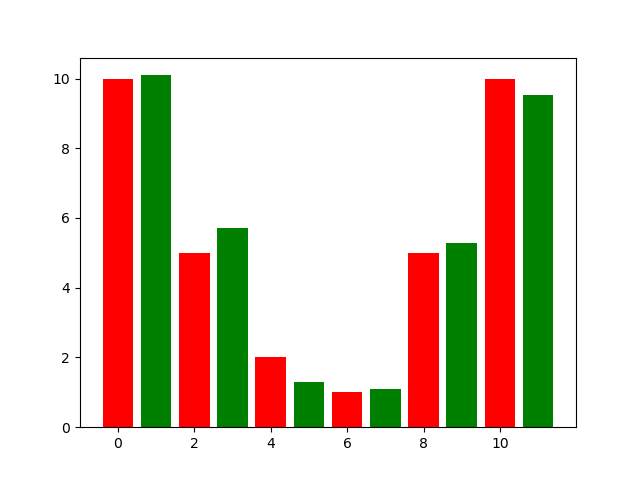

33.0 5.5


In [50]:
#%matplotlib widget
#plt.bar(x=range(len(a)),height=a)
#print(sum(a),a.mean())


%matplotlib widget
max_x = len(b)*2
ax = list(range(0,max_x,2))
bx = list(range(1,max_x,2))
colors = ["red"]*len(b)+ ["green"]*len(b)
xx=ax+bx
print (xx)
hh = np.concatenate([a,b])
print(hh)
print(colors)
plt.bar(x=xx,height=hh,color = colors)
plt.show()
print(sum(b),b.mean())

In [18]:

def get_params_list(nodes):    
    nodes=nodes.astype("int")    
    params=[]
    for i,u in enumerate(nodes):
        if i > 0 :
            first_layer = nodes[i-1]
            second_layer = u
            params.append(first_layer*second_layer)
        
    return params


pa= get_params_list(a*10)
pb = get_params_list(b*10)
print (pa,sum(pa))
print (pb,sum(pb))

[5000, 500, 100, 500, 5000] 11100
[5194, 424, 64, 424, 5194] 11300
